# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=


In [4]:
# Create empty lists to append the API calls
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initialize record to one
record = 1

In [5]:
# Start print statement 
print(f'Beginning of Data Retrieval\n-----------------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Keep appending lists despite missing values
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Replace the spaces between city names that have more than one word
        city_name_record = city.replace(" ", "%20")
        
        # Print output
        print(f'Processing Record {record} | {city}')
        print(f'{query_url}{city_name_record}')
       
        # Increase record by one
        record = record + 1
        
        # Pause loop for one second
        time.sleep(1)
        
 
    # If city is not found, skip to the next     
    except:
        print("City not found. Skipping...")

Beginning of Data Retrieval
-----------------------------------
Processing Record 1 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=svetlogorsk
Processing Record 2 | sao raimundo nonato
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=sao%20raimundo%20nonato
Processing Record 3 | alyangula
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=alyangula
Processing Record 4 | willowmore
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=willowmore
Processing Record 5 | caibarien
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=caibarien
Processing Record 6 | carmen
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=carmen
Processing Record 7 | bathsheba
http://api

Processing Record 57 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=yumen
Processing Record 58 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=yulara
Processing Record 59 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=saint%20george
Processing Record 60 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=klaksvik
Processing Record 61 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=port%20elizabeth
Processing Record 62 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=beringovskiy
Processing Record 63 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943d

Processing Record 113 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=hamilton
Processing Record 114 | naze
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=naze
Processing Record 115 | margate
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=margate
Processing Record 116 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kavieng
Processing Record 117 | thai nguyen
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=thai%20nguyen
Processing Record 118 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kapaa
Processing Record 119 | kollo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kollo
P

Processing Record 169 | santa fe
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=santa%20fe
Processing Record 170 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=san%20patricio
Processing Record 171 | bahia blanca
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=bahia%20blanca
Processing Record 172 | pitea
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=pitea
Processing Record 173 | dwarka
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dwarka
Processing Record 174 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=cabo%20san%20lucas
Processing Record 175 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f13

Processing Record 224 | sangar
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=sangar
Processing Record 225 | innisfail
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=innisfail
Processing Record 226 | ust-kulom
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ust-kulom
Processing Record 227 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=rundu
Processing Record 228 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=port%20hardy
Processing Record 229 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=polyarnyy
Processing Record 230 | mandan
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imper

Processing Record 279 | asau
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=asau
Processing Record 280 | tocopilla
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tocopilla
Processing Record 281 | san ramon
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=san%20ramon
Processing Record 282 | hachinohe
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=hachinohe
Processing Record 283 | noumea
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=noumea
Processing Record 284 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=rocha
Processing Record 285 | lop buri
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=lop%

Processing Record 336 | havoysund
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=havoysund
Processing Record 337 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=lazaro%20cardenas
Processing Record 338 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=leningradskiy
Processing Record 339 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nanortalik
Processing Record 340 | balkanabat
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=balkanabat
Processing Record 341 | atikokan
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=atikokan
Processing Record 342 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd8

Processing Record 393 | asosa
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=asosa
Processing Record 394 | palmer
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=palmer
Processing Record 395 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=husavik
Processing Record 396 | batagay
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=batagay
Processing Record 397 | barillas
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=barillas
Processing Record 398 | rameswaram
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=rameswaram
Processing Record 399 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ma

Processing Record 449 | izhma
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=izhma
Processing Record 450 | antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=antofagasta
Processing Record 451 | tougue
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tougue
Processing Record 452 | haverfordwest
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=haverfordwest
Processing Record 453 | xai-xai
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=xai-xai
Processing Record 454 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=henties%20bay
Processing Record 455 | bundaberg
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6f

City not found. Skipping...
Processing Record 505 | le moule
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=le%20moule
Processing Record 506 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=vanimo
Processing Record 507 | oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=oranjestad
Processing Record 508 | wanning
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=wanning
Processing Record 509 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=puerto%20escondido
City not found. Skipping...
Processing Record 510 | najran
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=najran
Processing Record 511 | carnduff
http://api.openweathermap.o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary using the lists above 
cities_summary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Convert dictionary into a DataFrame
weather_data = pd.DataFrame(cities_summary)

# Count values 
weather_data.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [7]:
# Export DataFrame into a csv file
weather_data.to_csv("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Data_CSV/weather_data.csv")


# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Svetlogorsk,91,BY,1581190638,96,52.63,29.73,27.05,5.48
1,Sao Raimundo Nonato,86,BR,1581190640,87,-9.02,-42.70,77.27,4.09
2,Alyangula,56,AU,1581190641,94,-13.85,136.42,78.80,1.12
3,Willowmore,42,ZA,1581190444,82,-33.29,23.49,65.41,7.25
4,Caibarien,75,CU,1581190644,66,22.52,-79.47,84.20,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

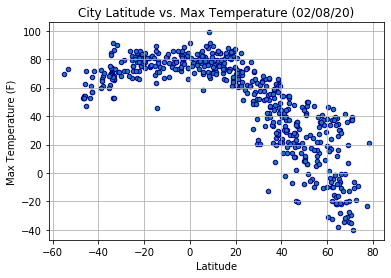

In [8]:

# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_temp.png")


# Display scatter plot
plt.show()

#### Latitude vs. Humidity Plot

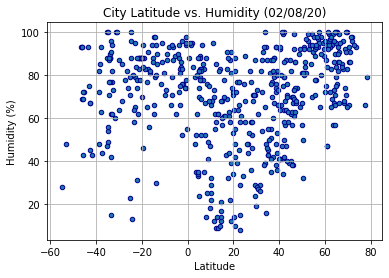

In [9]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Humidity (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_humidity.png")

# Display scatter plot
plt.show()

#### Latitude vs. Cloudiness Plot

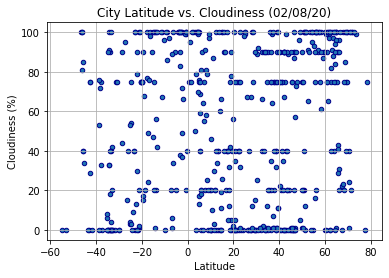

In [10]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_cloudiness.png")

# Display scatter plot
plt.show()

#### Latitude vs. Wind Speed Plot

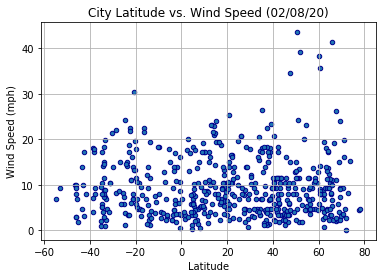

In [11]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_wind.png")

# Display scatter plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
def gethemisphere(row):

    if row['Lat'] <=0:

        val = 'Southern'

    elif row['Lat'] > 0:

        val = 'Northern'

    return val

In [14]:
# Create Northern and Southern Hemisphere DataFrames
weather_data['Hemisphere'] = weather_data.apply(gethemisphere, axis=1)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Svetlogorsk,91,BY,1581190638,96,52.63,29.73,27.05,5.48,Northern
1,Sao Raimundo Nonato,86,BR,1581190640,87,-9.02,-42.70,77.27,4.09,Southern
2,Alyangula,56,AU,1581190641,94,-13.85,136.42,78.80,1.12,Southern
3,Willowmore,42,ZA,1581190444,82,-33.29,23.49,65.41,7.25,Southern
4,Caibarien,75,CU,1581190644,66,22.52,-79.47,84.20,12.75,Northern


In [15]:
northern_df = weather_data.loc[weather_data["Hemisphere"]== "Northern"]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Svetlogorsk,91,BY,1581190638,96,52.63,29.73,27.05,5.48,Northern
4,Caibarien,75,CU,1581190644,66,22.52,-79.47,84.20,12.75,Northern
5,Ciudad del Carmen,75,MX,1581190644,58,18.63,-91.83,86.00,10.29,Northern
6,Bathsheba,40,BB,1581190646,62,13.22,-59.52,84.20,23.04,Northern
9,Qaanaaq,0,GL,1581190650,66,77.48,-69.36,-23.24,4.34,Northern


In [16]:
southern_df = weather_data.loc[weather_data["Hemisphere"]== "Southern"]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,Sao Raimundo Nonato,86,BR,1581190640,87,-9.02,-42.70,77.27,4.09,Southern
2,Alyangula,56,AU,1581190641,94,-13.85,136.42,78.80,1.12,Southern
3,Willowmore,42,ZA,1581190444,82,-33.29,23.49,65.41,7.25,Southern
7,Lorengau,66,PG,1581190647,76,-2.02,147.27,82.96,13.80,Southern
8,Bluff,100,NZ,1581190649,93,-46.60,168.33,53.01,10.00,Southern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.858916119262596


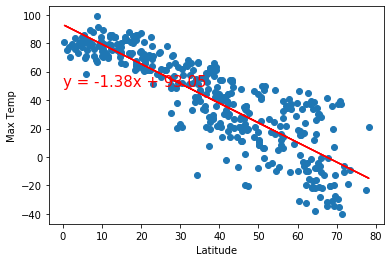

In [18]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5613213717095287


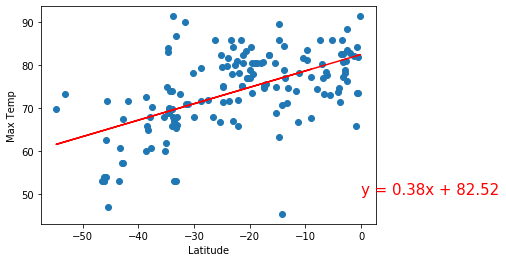

In [19]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.42939419594300715


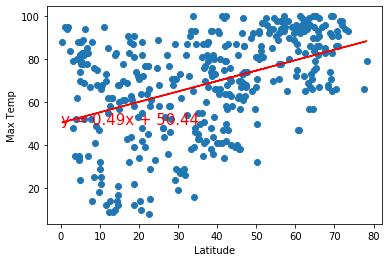

In [20]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2370835073865878


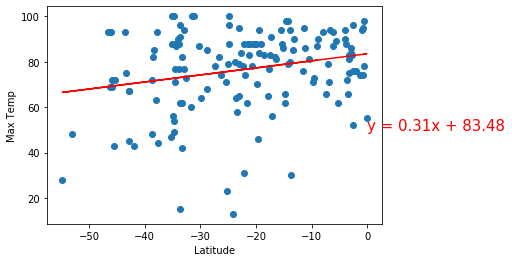

In [21]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2097233028380392


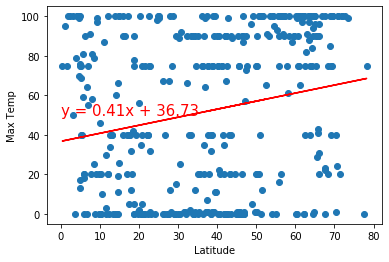

In [22]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3595654428496065


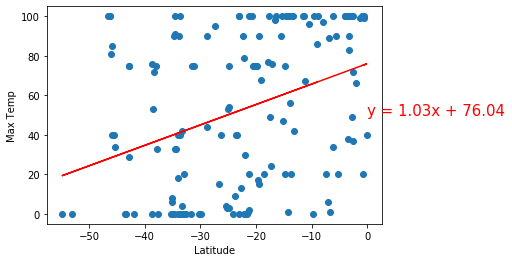

In [23]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0010313572738780874


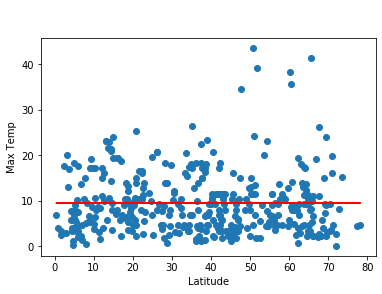

In [24]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.058352258140233135


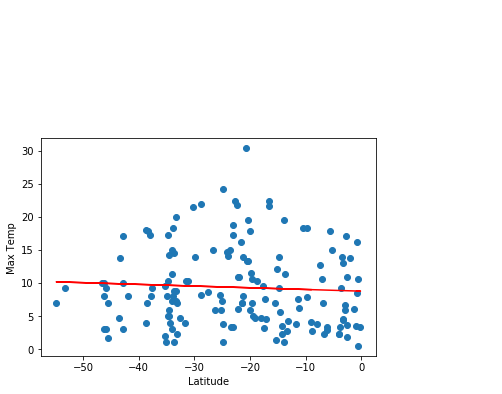

In [25]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()